In [1]:
import imblearn
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import getpass
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder

warnings.filterwarnings('ignore')

### Loading and Data Cleaning

In [2]:
data = pd.read_excel('creditcardmarketing.xlsx')
data

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17996,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17996,17997,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17997,17998,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17998,17999,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


In [3]:
data.shape

(18000, 17)

In [4]:
data.dtypes

Customer Number           int64
Offer Accepted           object
Reward                   object
Mailer Type              object
Income Level             object
# Bank Accounts Open      int64
Overdraft Protection     object
Credit Rating            object
# Credit Cards Held       int64
# Homes Owned             int64
Household Size            int64
Own Your Home            object
Average Balance         float64
Q1 Balance              float64
Q2 Balance              float64
Q3 Balance              float64
Q4 Balance              float64
dtype: object

In [5]:
data.describe()

,Customer Number,# Bank Accounts Open,# Credit Cards Held,# Homes Owned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,9000.500000,1.255778,1.903500,1.203444,3.499056,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.296758,0.472501,0.797009,0.427341,1.114182,350.297837,620.077060,457.402268,553.452599,559.001365
min,1.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4500.750000,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000,363.000000
50%,9000.500000,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,13500.250000,1.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


In [6]:
data.columns = [data.columns[i].lower().replace(' ', '_') for i in range(len(data.columns)) ]
data.columns

Index(['customer_number', 'offer_accepted', 'reward', 'mailer_type',
       'income_level', '#_bank_accounts_open', 'overdraft_protection',
       'credit_rating', '#_credit_cards_held', '#_homes_owned',
       'household_size', 'own_your_home', 'average_balance', 'q1_balance',
       'q2_balance', 'q3_balance', 'q4_balance'],
      dtype='object')

In [7]:
data.isna().sum()

customer_number          0
offer_accepted           0
reward                   0
mailer_type              0
income_level             0
#_bank_accounts_open     0
overdraft_protection     0
credit_rating            0
#_credit_cards_held      0
#_homes_owned            0
household_size           0
own_your_home            0
average_balance         24
q1_balance              24
q2_balance              24
q3_balance              24
q4_balance              24
dtype: int64

In [8]:
#There is only 24 NaNs in the dataset in balance variables, therefore I will drop those

In [9]:
data = data.dropna()

In [10]:
data.isna().sum()

customer_number         0
offer_accepted          0
reward                  0
mailer_type             0
income_level            0
#_bank_accounts_open    0
overdraft_protection    0
credit_rating           0
#_credit_cards_held     0
#_homes_owned           0
household_size          0
own_your_home           0
average_balance         0
q1_balance              0
q2_balance              0
q3_balance              0
q4_balance              0
dtype: int64

In [11]:
data = data.set_index('customer_number')
data

,offer_accepted,reward,mailer_type,income_level,#_bank_accounts_open,overdraft_protection,credit_rating,#_credit_cards_held,#_homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
customer_number,,,,,,,,,,,,,,,,
1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17996,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17997,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17998,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0


### EDA

#### Data imbalance detected 

In [12]:
data['offer_accepted'].value_counts()

No     16955
Yes     1021
Name: offer_accepted, dtype: int64

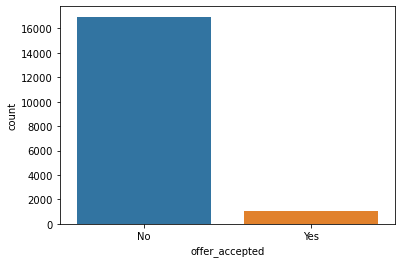

In [13]:
sns.countplot(x='offer_accepted', data=data)
plt.show()

#### No high correlation between variables 

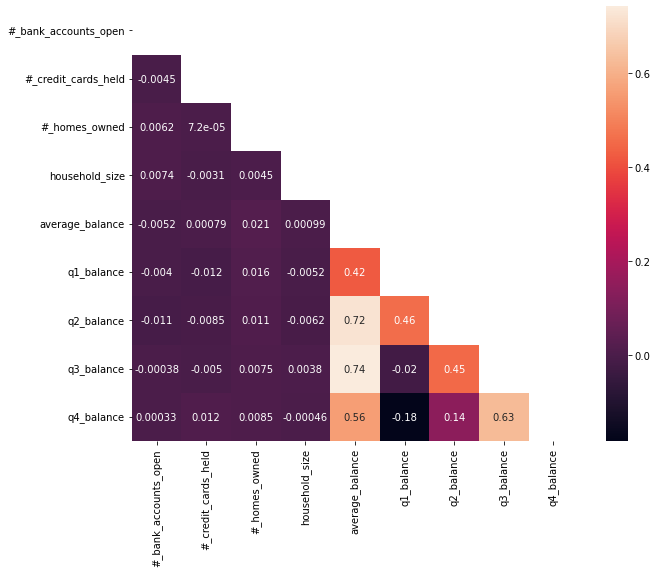

In [14]:
corr_data = data.select_dtypes([np.number])
correlations_matrix = corr_data.corr(method='spearman') 

mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

### Benchmark Model

In [15]:
y = data['offer_accepted']
X = data.drop(['offer_accepted'], axis=1)

In [16]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = 'object')

In [17]:
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(X_cat)

OneHotEncoder(drop='first')

In [18]:
encoded = encoder.transform(X_cat).toarray()

In [19]:
X = np.concatenate([X_num, encoded], axis=1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

#### Without taking care of data imbalance, the model predicts all points as 'No'

In [22]:
predictions = classification.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.94      1.00      0.97      3392
         Yes       0.00      0.00      0.00       204

    accuracy                           0.94      3596
   macro avg       0.47      0.50      0.49      3596
weighted avg       0.89      0.94      0.92      3596



#### Using methods to deal with data imbalance 

In [23]:
#SMOTE

In [24]:
from imblearn.over_sampling import SMOTE

y = data['offer_accepted']
X = data.drop(['offer_accepted'], axis=1)

X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = 'object')

encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(X_cat)

encoded = encoder.transform(X_cat).toarray()

X = np.concatenate([X_num, encoded], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [25]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

predictions = classification.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.97      0.69      0.80      3392
         Yes       0.12      0.70      0.20       204

    accuracy                           0.69      3596
   macro avg       0.55      0.69      0.50      3596
weighted avg       0.93      0.69      0.77      3596



<AxesSubplot:>

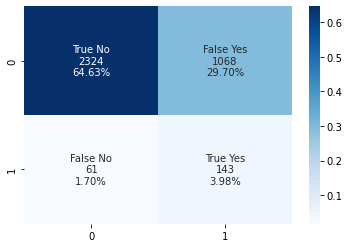

In [26]:
cf_matrix = confusion_matrix(y_test, predictions, normalize='all')
cf_matrix_2 = confusion_matrix(y_test, predictions)

group_names = ['True No', 'False Yes', 'False No', 'True Yes']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [27]:
#Random Oversampling

In [28]:
from imblearn.over_sampling import RandomOverSampler

y = data['offer_accepted']
X = data.drop(['offer_accepted'], axis=1)

X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = 'object')

encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(X_cat)

encoded = encoder.transform(X_cat).toarray()

X = np.concatenate([X_num, encoded], axis=1)


scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train_scaled, y_train)

In [29]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

predictions = classification.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.94      0.82      0.88      3392
         Yes       0.06      0.18      0.08       204

    accuracy                           0.78      3596
   macro avg       0.50      0.50      0.48      3596
weighted avg       0.89      0.78      0.83      3596



In [30]:
#Random Undersampling

In [31]:
from imblearn.under_sampling import RandomUnderSampler

y = data['offer_accepted']
X = data.drop(['offer_accepted'], axis=1)

X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = 'object')

encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(X_cat)

encoded = encoder.transform(X_cat).toarray()

X = np.concatenate([X_num, encoded], axis=1)

rus = RandomUnderSampler(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_, y_train_ = rus.fit_resample(X_train, y_train)


classification = LogisticRegression(random_state=42, max_iter=100000)
classification.fit(X_train_, y_train_)

predictions = classification.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.97      0.67      0.79      3392
         Yes       0.11      0.71      0.20       204

    accuracy                           0.67      3596
   macro avg       0.54      0.69      0.49      3596
weighted avg       0.93      0.67      0.76      3596



In [32]:
#Tomeklinks

In [33]:
from imblearn.under_sampling import TomekLinks

y = data['offer_accepted']
X = data.drop(['offer_accepted'], axis=1)

X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = 'object')

encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(X_cat)
encoded = encoder.transform(X_cat).toarray()
X = np.concatenate([X_num, encoded], axis=1)


tomek = TomekLinks()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, y_train = tomek.fit_resample(X, y)


classification = LogisticRegression(random_state=42, max_iter=100000)
classification.fit(X_train, y_train)

predictions = classification.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.94      1.00      0.97      3392
         Yes       0.00      0.00      0.00       204

    accuracy                           0.94      3596
   macro avg       0.47      0.50      0.49      3596
weighted avg       0.89      0.94      0.92      3596



### Optimization of the Model

In [34]:
#BoxCox

In [35]:
from scipy import stats

def boxcox_transform(df):
    numeric_cols = df.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        df[column] = np.where(df[column]<=0, np.NAN, df[column]) 
        df[column] = df[column].fillna(df[column].mean())
        transformed_data, ci = stats.boxcox(df[column])
        df[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci

df, _ci = boxcox_transform(data)

In [36]:
y = data['offer_accepted']
X = data.drop(['offer_accepted'], axis=1)

X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = 'object')

encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(X_cat)

encoded = encoder.transform(X_cat).toarray()

X = np.concatenate([X_num, encoded], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train) 

classification = LogisticRegression(random_state=42, max_iter=100000)
classification.fit(X_train, y_train)

predictions = classification.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.97      0.67      0.79      3392
         Yes       0.11      0.71      0.20       204

    accuracy                           0.67      3596
   macro avg       0.54      0.69      0.50      3596
weighted avg       0.93      0.67      0.76      3596



<AxesSubplot:>

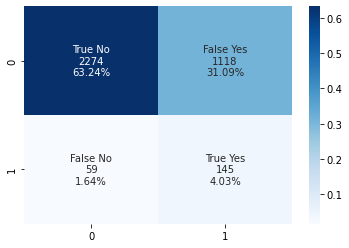

In [37]:
cf_matrix = confusion_matrix(y_test, predictions, normalize='all')
cf_matrix_2 = confusion_matrix(y_test, predictions)

group_names = ['True No', 'False Yes', 'False No', 'True Yes']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [38]:
#StandardScaler

In [39]:
scaler = StandardScaler()

y = data['offer_accepted']
X = data.drop(['offer_accepted'], axis=1)

X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = 'object')

encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(X_cat)

encoded = encoder.transform(X_cat).toarray()
X = np.concatenate([X_num, encoded], axis=1)

X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train) 

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train_scaled, y_train)

predictions = classification.predict(X_test_scaled)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.97      0.70      0.81      3392
         Yes       0.12      0.68      0.20       204

    accuracy                           0.70      3596
   macro avg       0.55      0.69      0.51      3596
weighted avg       0.92      0.70      0.78      3596



In [40]:
#Normalizer

In [41]:
scaler = Normalizer()

y = data['offer_accepted']
X = data.drop(['offer_accepted'], axis=1)

X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = 'object')

encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(X_cat)

encoded = encoder.transform(X_cat).toarray()
X = np.concatenate([X_num, encoded], axis=1)

X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train) 

classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

predictions = classification.predict(X_test_scaled)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.95      0.68      0.80      3392
         Yes       0.07      0.37      0.11       204

    accuracy                           0.67      3596
   macro avg       0.51      0.53      0.45      3596
weighted avg       0.90      0.67      0.76      3596



In [42]:
#Dropping Outliers

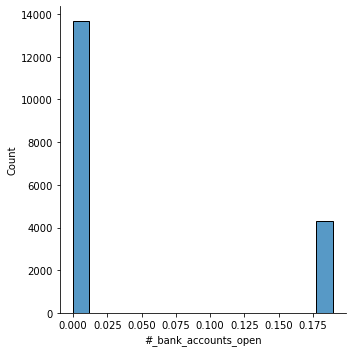

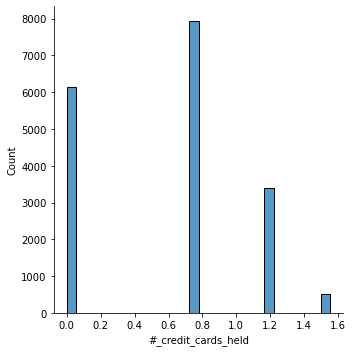

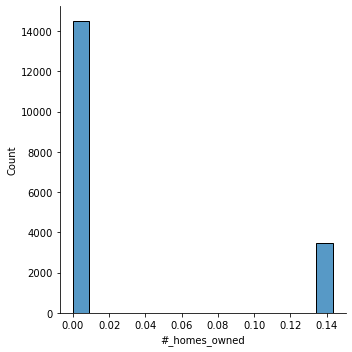

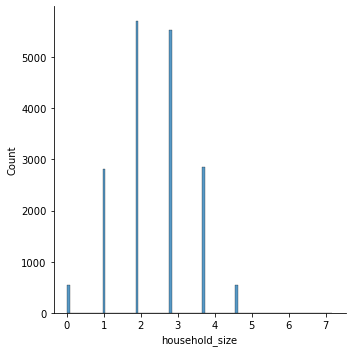

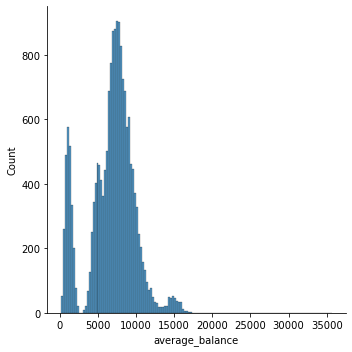

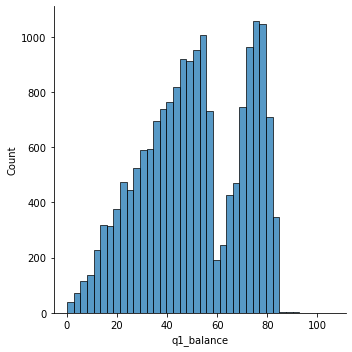

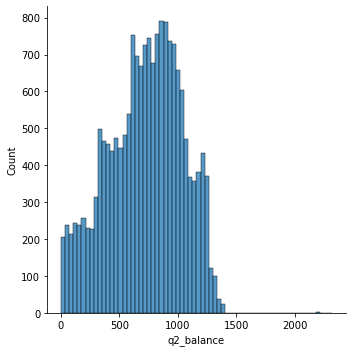

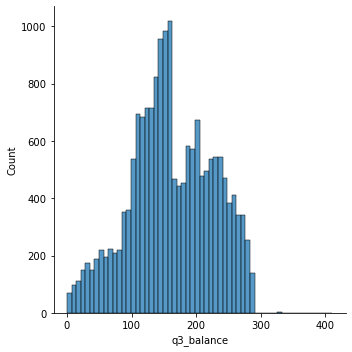

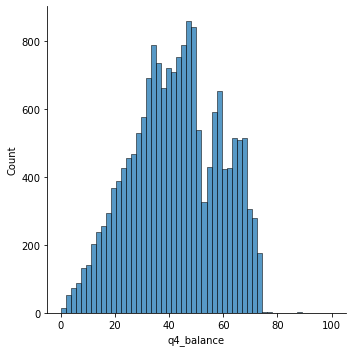

In [43]:
for col in data.select_dtypes(np.number):
    sns.displot(data[col])
    plt.show()

In [44]:
data_copy = data.copy()

data_copy = data_copy[data_copy['average_balance'] < 1500]
data_copy = data_copy[data_copy['q2_balance'] < 1500]
data_copy = data_copy[data_copy['q3_balance'] < 300]
data_copy = data_copy[data_copy['q4_balance'] < 80]

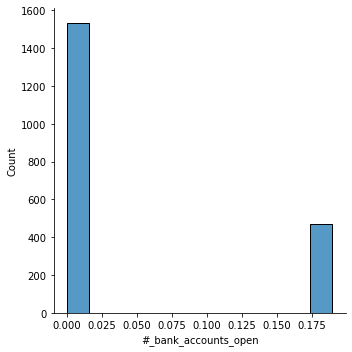

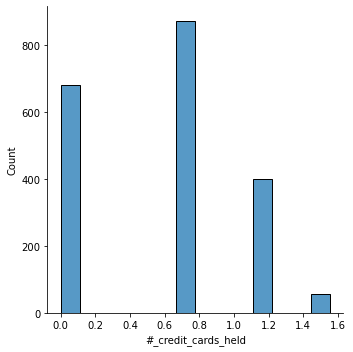

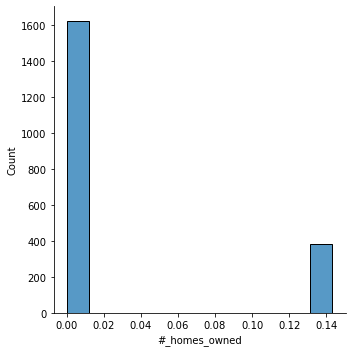

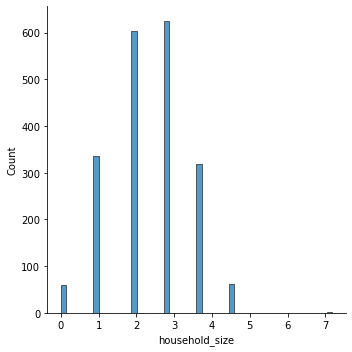

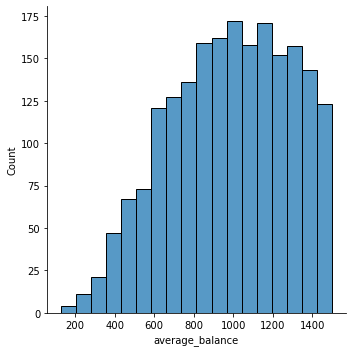

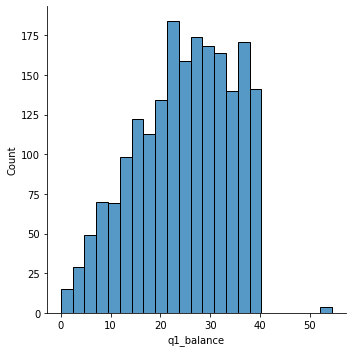

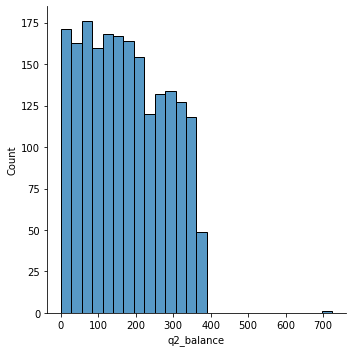

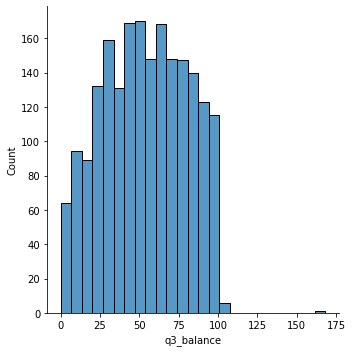

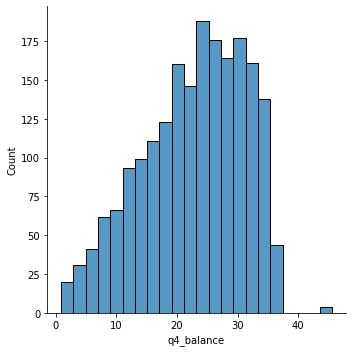

In [45]:
for col in data_copy.select_dtypes(np.number):
    sns.displot(data_copy[col])
    plt.show()

#### Dropping outliers improves recall but decreases specificity and accuracy of the model

In [46]:
y = data_copy['offer_accepted']
X = data_copy.drop(['offer_accepted'], axis=1)

X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = 'object')

encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(X_cat)

encoded = encoder.transform(X_cat).toarray()

X = np.concatenate([X_num, encoded], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train) 

classification = LogisticRegression(random_state=42, max_iter=100000, class_weight={'Yes':2})

classification.fit(X_train, y_train)

predictions = classification.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.99      0.46      0.63       377
         Yes       0.10      0.96      0.18        24

    accuracy                           0.49       401
   macro avg       0.55      0.71      0.41       401
weighted avg       0.94      0.49      0.61       401



In [47]:
# The best model has One Hot Encoder, SMOTE, BoxCox Transformation and no drops of outliers

### Comparing Models

In [48]:
# MultinomialNB

In [49]:
from sklearn.naive_bayes import MultinomialNB

y = data['offer_accepted']
X = data.drop(['offer_accepted'], axis=1)

X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = 'object')

encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(X_cat)

encoded = encoder.transform(X_cat).toarray()

X = np.concatenate([X_num, encoded], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train) 

clf = MultinomialNB()
clf.fit(X_train, y_train)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.95      0.49      0.64      3392
         Yes       0.07      0.60      0.12       204

    accuracy                           0.49      3596
   macro avg       0.51      0.54      0.38      3596
weighted avg       0.90      0.49      0.61      3596



In [50]:
# GaussianNB

In [51]:
from sklearn.naive_bayes import GaussianNB

y = data['offer_accepted']
X = data.drop(['offer_accepted'], axis=1)

X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = 'object')

encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(X_cat)

encoded = encoder.transform(X_cat).toarray()

X = np.concatenate([X_num, encoded], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train) 


clf = GaussianNB()
clf.fit(X_train, y_train)
GaussianNB()

#clf_pf = GaussianNB()
#clf_pf.partial_fit(X, Y, np.unique(Y))
#GaussianNB()

predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.97      0.72      0.82      3392
         Yes       0.11      0.58      0.18       204

    accuracy                           0.71      3596
   macro avg       0.54      0.65      0.50      3596
weighted avg       0.92      0.71      0.79      3596



In [52]:
# SVC

In [53]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

y = data['offer_accepted']
X = data.drop(['offer_accepted'], axis=1)

X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = 'object')

encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(X_cat)

encoded = encoder.transform(X_cat).toarray()

X = np.concatenate([X_num, encoded], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train) 



clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.95      0.98      0.96      3392
         Yes       0.15      0.06      0.09       204

    accuracy                           0.93      3596
   macro avg       0.55      0.52      0.52      3596
weighted avg       0.90      0.93      0.91      3596



In [54]:
# KNeighborsClassifier

In [55]:
from sklearn.neighbors import KNeighborsClassifier

y = data['offer_accepted']
X = data.drop(['offer_accepted'], axis=1)

X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = 'object')

encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(X_cat)

encoded = encoder.transform(X_cat).toarray()

X = np.concatenate([X_num, encoded], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train) 



clf = KNeighborsClassifier(n_neighbors=3)
clf = clf.fit(X, y)
KNeighborsClassifier()

predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.95      1.00      0.97      3392
         Yes       0.76      0.14      0.23       204

    accuracy                           0.95      3596
   macro avg       0.85      0.57      0.60      3596
weighted avg       0.94      0.95      0.93      3596



In [56]:
# DecisionTreeClassifier

In [57]:
from sklearn.tree import DecisionTreeClassifier

y = data['offer_accepted']
X = data.drop(['offer_accepted'], axis=1)

X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = 'object')

encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(X_cat)

encoded = encoder.transform(X_cat).toarray()

X = np.concatenate([X_num, encoded], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train) 



clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.95      0.94      0.94      3392
         Yes       0.13      0.15      0.14       204

    accuracy                           0.90      3596
   macro avg       0.54      0.55      0.54      3596
weighted avg       0.90      0.90      0.90      3596

